# House Price Prediction

## In this notebook we will predicit the house price based on some features

## Importing Libraries
<b>numpy</b> for mathematical operations on data<br>
<b>pandas</b> for managing data<br>
<b>matplotlib.plt</b> for plotting stastical graphs<br>
<b>seaborn</b> for plotting interactive graphs<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading and exploring dataset

In [87]:
xd=pd.read_csv("chennai_house_price_prediction.csv")

In [89]:
xd.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [2]:
df=pd.read_csv("chennai_house_price_prediction.csv")

In [3]:
df.shape

(7109, 19)

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


It is pretty intuitive that <b>PRT_ID</b> is not of any use do let's drop it.<br>
After that categorise numerical and categorical features

In [5]:
df.drop(["PRT_ID"],axis=1,inplace=True)

In [6]:
num_cols=["INT_SQFT","DIST_MAINROAD","N_BEDROOM","N_BATHROOM","N_ROOM","QS_ROOMS","QS_BATHROOM",
          "QS_BEDROOM","QS_OVERALL","COMMIS"]
cat_cols=["AREA","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"]

In [7]:
df.describe(include="all")

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


## Univariate analysis

### On categorical features

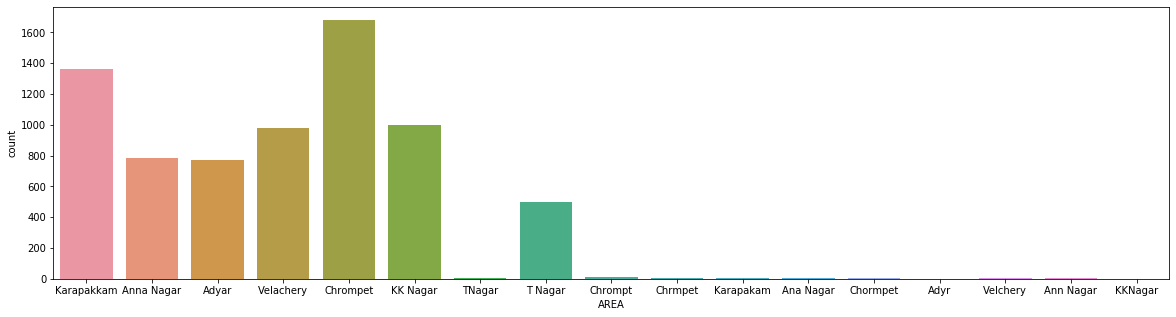

In [8]:
plt.figure(figsize=(20,5))
sns.countplot(x="AREA",data=df)

It can be clearly seen that there are some areas which are categorized differently from their group because of spelling erros.<br>
So let's correct them

In [9]:
df.replace(["TNagar","Chrompt","Chrmpet","Karapakam","Ana Nagar","Chormpet","Adyr",
           "Velchery","Ann Nagar","KKNagar"],
           ["T Nagar","Chrompet","Chrompet","Karapakkam","Anna Nagar","Chrompet","Adyar",
            "Velachery","Anna Nagar","KK Nagar"],inplace=True)

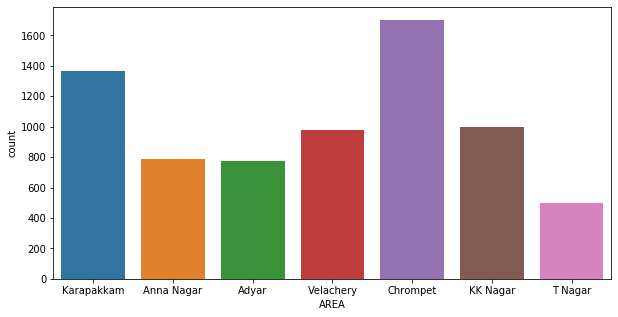

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x="AREA",data=df)

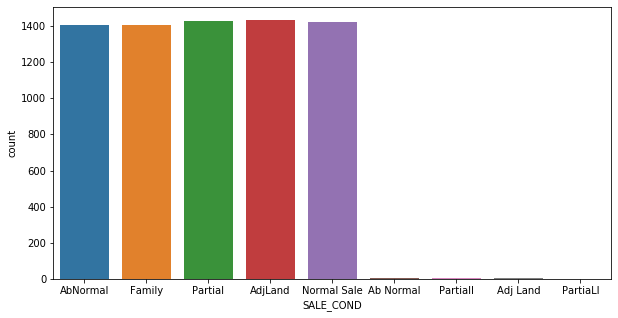

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x="SALE_COND",data=df)

Here again we can see that there are some spelling errors

In [12]:
df.replace(["Ab Normal","Partiall","Adj Land","PartiaLl"],["AbNormal","Partial","AdjLand","Partial"],inplace=True)

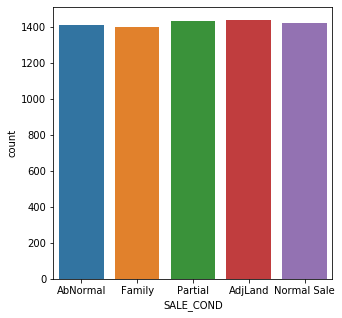

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x="SALE_COND",data=df)

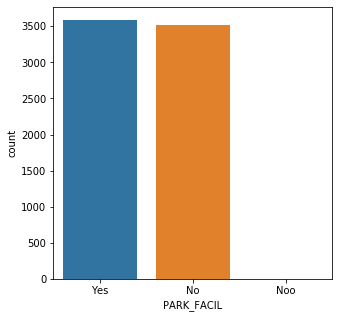

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x="PARK_FACIL",data=df)

Again spelling errors

In [15]:
df.replace("Noo","No",inplace=True)

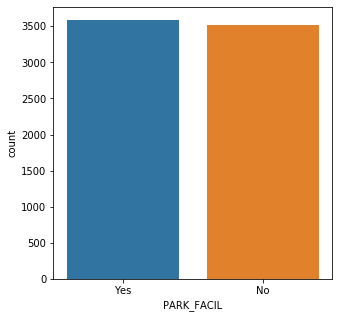

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x="PARK_FACIL",data=df)

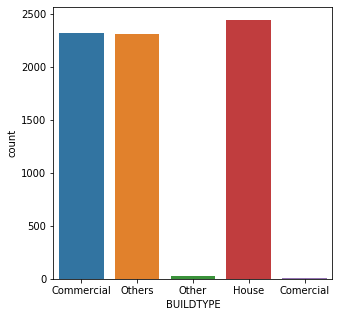

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x="BUILDTYPE",data=df)

Again spelling errors

In [18]:
df.replace(["Comercial","Other"],["Commercial","Others"],inplace=True)

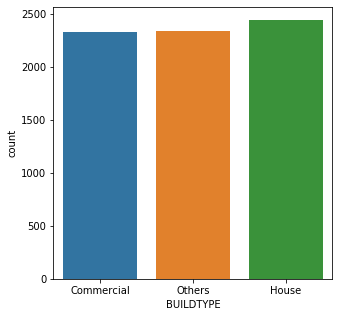

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x="BUILDTYPE",data=df)

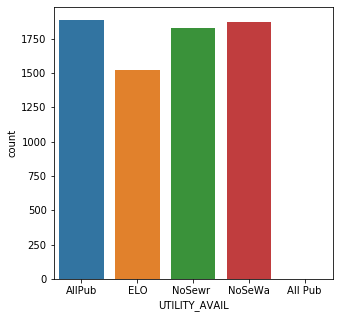

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x="UTILITY_AVAIL",data=df)

Spelling errors

In [21]:
df.replace("All Pub","AllPub",inplace=True)

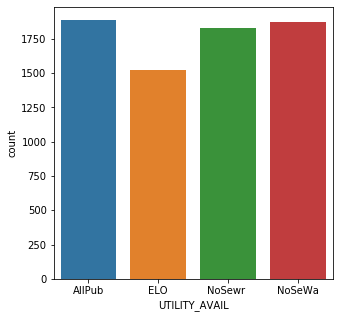

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(x="UTILITY_AVAIL",data=df)

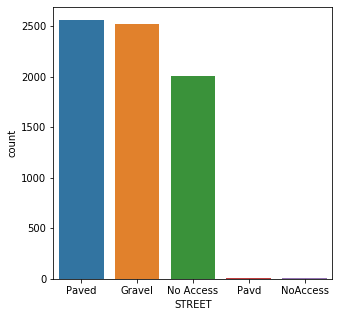

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x="STREET",data=df)

Spelling errors

In [24]:
df.replace(["Pavd","NoAccess"],["Paved","No Access"],inplace=True)

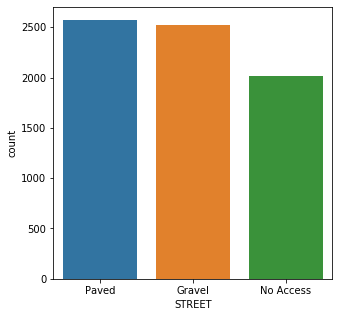

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(x="STREET",data=df)

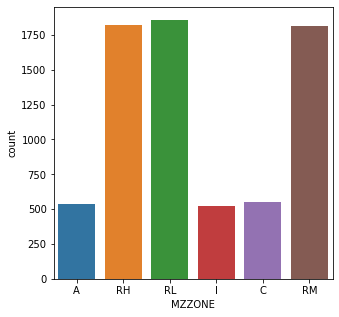

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(x="MZZONE",data=df)

### For numerical data

{'whiskers': [<matplotlib.lines.Line2D at 0x2a02b44d588>,
 'caps': [<matplotlib.lines.Line2D at 0x2a02b48eac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a02b48a6c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2a02b492bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a02b480c08>],
 'means': []}

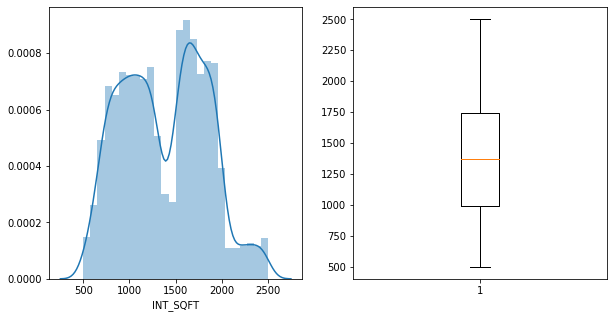

In [27]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df["INT_SQFT"])

plt.subplot(1,2,2)
plt.boxplot(df["INT_SQFT"])

This data is bimodal so let's normalize it

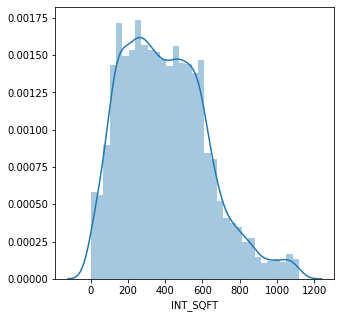

In [28]:
plt.figure(figsize=(5,5))
transformed=abs(df["INT_SQFT"] 
                - 1382)
sns.distplot(transformed)

In [29]:
df["INT_SQFT_NEW"]=transformed

In [30]:
df.drop("INT_SQFT",axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a02c6f1588>,
 'caps': [<matplotlib.lines.Line2D at 0x2a02c6f1e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a02c6eeb48>],
 'medians': [<matplotlib.lines.Line2D at 0x2a02c6f5dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a02c6fac48>],
 'means': []}

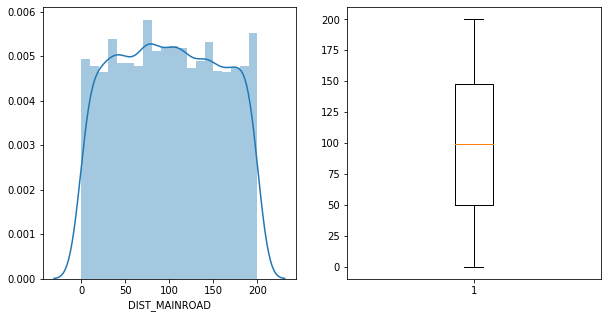

In [31]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df["DIST_MAINROAD"])

plt.subplot(1,2,2)
plt.boxplot(df["DIST_MAINROAD"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a02c7c73c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2a02c7c7d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a02c7c3848>],
 'medians': [<matplotlib.lines.Line2D at 0x2a02c7cce08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a02c7d1e08>],
 'means': []}

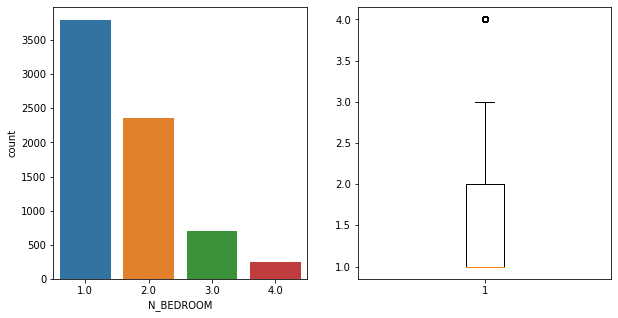

In [32]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["N_BEDROOM"].dropna())

plt.subplot(1,2,2)
plt.boxplot(df["N_BEDROOM"].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x2a02c822a08>,
 'caps': [<matplotlib.lines.Line2D at 0x2a02c892d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a02c88ba88>],
 'medians': [<matplotlib.lines.Line2D at 0x2a02c897d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a02c89bb88>],
 'means': []}

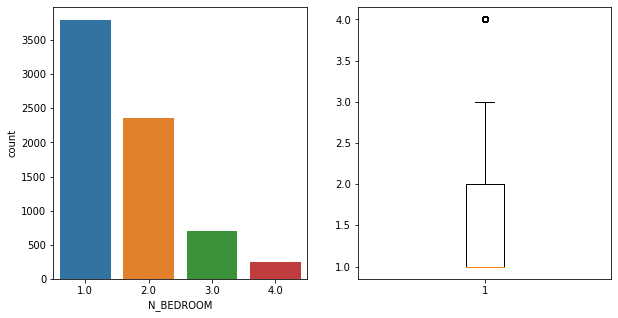

In [33]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["N_BEDROOM"].dropna())

plt.subplot(1,2,2)
plt.boxplot(df["N_BEDROOM"].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x2a02c962348>,
 'caps': [<matplotlib.lines.Line2D at 0x2a02c962cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a02c95d7c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2a02c966dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a02c96adc8>],
 'means': []}

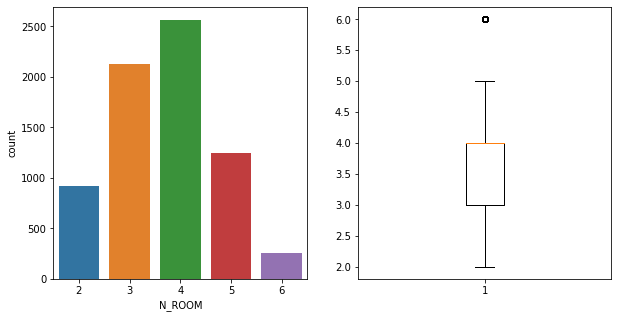

In [34]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["N_ROOM"])

plt.subplot(1,2,2)
plt.boxplot(df["N_ROOM"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a02ca56d08>,
 'caps': [<matplotlib.lines.Line2D at 0x2a02ca5acc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a02ca56308>],
 'medians': [<matplotlib.lines.Line2D at 0x2a02ca5ccc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a02ca5cdc8>],
 'means': []}

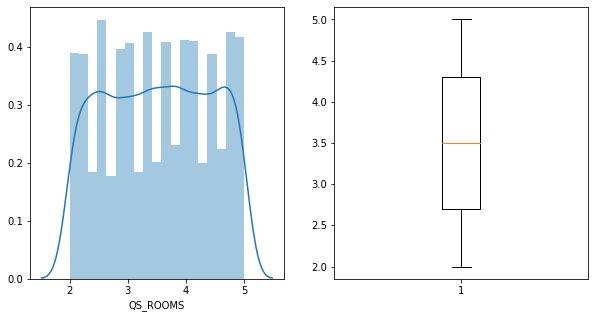

In [35]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df["QS_ROOMS"])

plt.subplot(1,2,2)
plt.boxplot(df["QS_ROOMS"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a02cb4b6c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2a02cb4bf88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a02cb46c88>],
 'medians': [<matplotlib.lines.Line2D at 0x2a02cb4ff08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a02cb53d88>],
 'means': []}

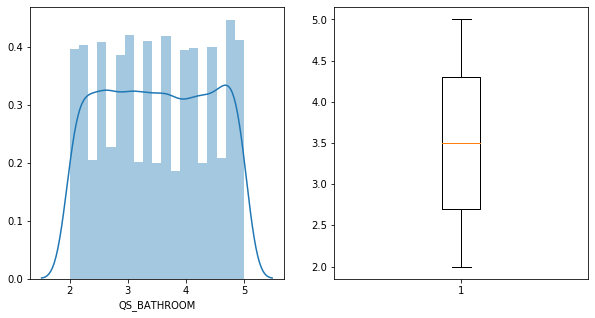

In [36]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df["QS_BATHROOM"])

plt.subplot(1,2,2)
plt.boxplot(df["QS_BATHROOM"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a02cc42f88>,
 'caps': [<matplotlib.lines.Line2D at 0x2a02cc46fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a02cc42748>],
 'medians': [<matplotlib.lines.Line2D at 0x2a02cc4af48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a02cc4afc8>],
 'means': []}

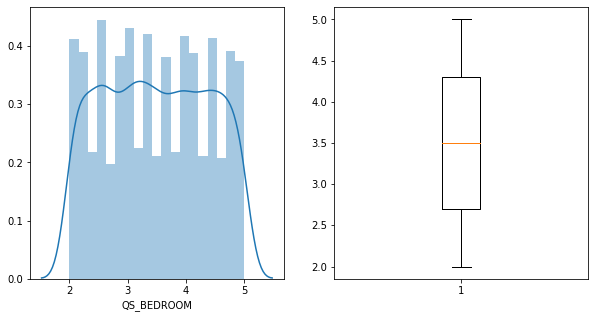

In [37]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df["QS_BEDROOM"])

plt.subplot(1,2,2)
plt.boxplot(df["QS_BEDROOM"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a02cd6ff88>,
 'caps': [<matplotlib.lines.Line2D at 0x2a02cd71f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a02cd6f748>],
 'medians': [<matplotlib.lines.Line2D at 0x2a02cd77f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a02cd77fc8>],
 'means': []}

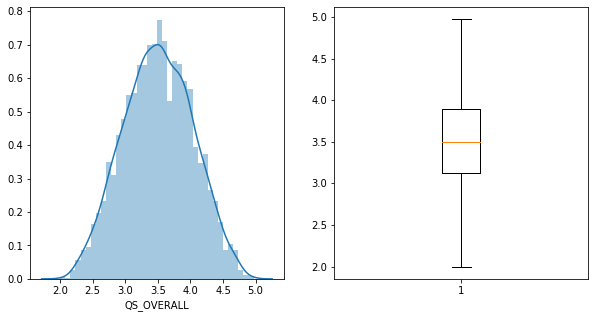

In [38]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df["QS_OVERALL"].dropna())

plt.subplot(1,2,2)
plt.boxplot(df["QS_OVERALL"].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x2a02cecebc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2a02ced2b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a02cece1c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2a02cddc048>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a02ced7c08>],
 'means': []}

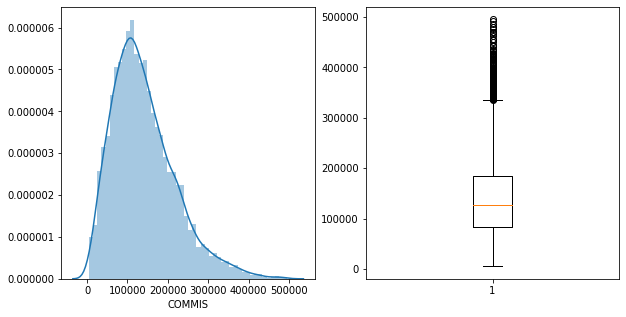

In [39]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df["COMMIS"])

plt.subplot(1,2,2)
plt.boxplot(df["COMMIS"])

# Bivariate Analysis

### For categorical features

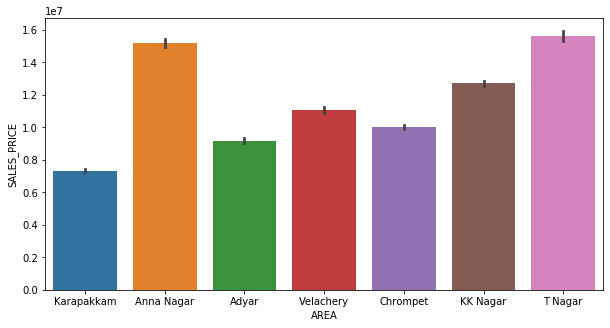

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x="AREA",y="SALES_PRICE",data=df)

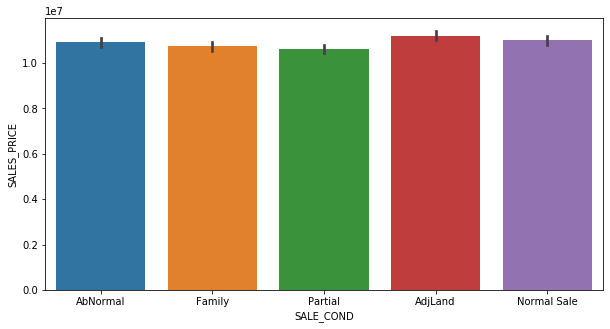

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x="SALE_COND",y="SALES_PRICE",data=df)

The feature <b>SALE_COND</b> can  be dropped as it does not vary much for different values

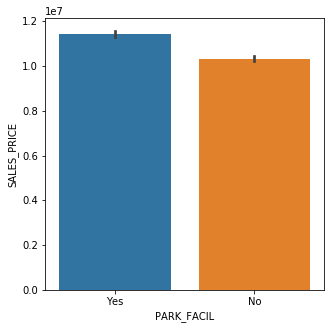

In [42]:
plt.figure(figsize=(5,5))
sns.barplot(x="PARK_FACIL",y="SALES_PRICE",data=df)

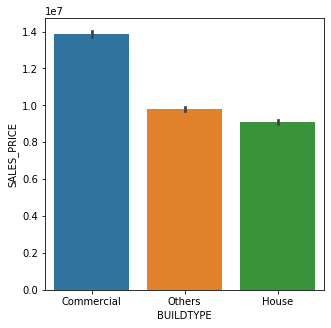

In [43]:
plt.figure(figsize=(5,5))
sns.barplot(x="BUILDTYPE",y="SALES_PRICE",data=df)

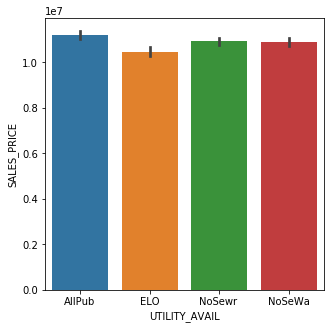

In [44]:
plt.figure(figsize=(5,5))
sns.barplot(x="UTILITY_AVAIL",y="SALES_PRICE",data=df)

The feature <b>UTILITY_AVAIL</b> can  be dropped as it does not vary much for different values

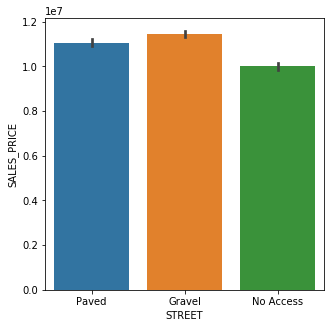

In [45]:
plt.figure(figsize=(5,5))
sns.barplot(x="STREET",y="SALES_PRICE",data=df)

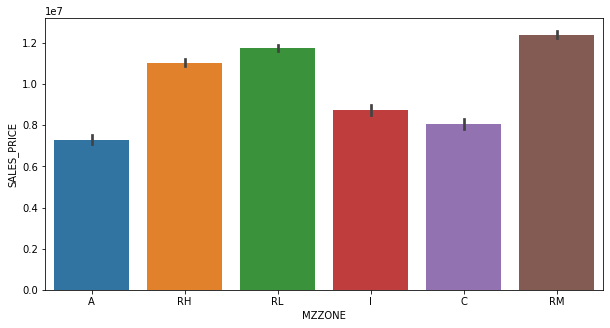

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x="MZZONE",y="SALES_PRICE",data=df)

### For numerical features

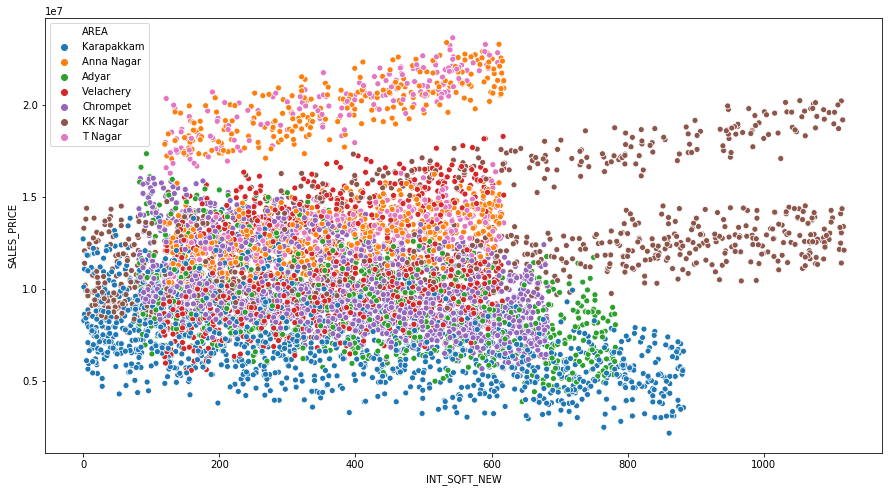

In [47]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="INT_SQFT_NEW",y="SALES_PRICE",hue="AREA",data=df)

It is clearly visible that houses of area<b> Anna Nagar</b> and<b> T Nagar</b> have relatively higher price even for small<b> INT_SQFT_NEW</b><br>
We can divide<b> INT_SQFT_NEW</b> in two columns one  having<b> Anna Nagar</b> and<b> T Nagar</b> and other having all other <b>areas</b>.

In [48]:
df["INT_SQFT_1"]=df["INT_SQFT_NEW"].copy()
df["INT_SQFT_2"]=df["INT_SQFT_NEW"].copy()

In [49]:
df.loc[df["AREA"]=="Anna Nagar","INT_SQFT_2"]=0
df.loc[df["AREA"]=="T Nagar","INT_SQFT_2"]=0
df.loc[df["AREA"]!="Anna Nagar","INT_SQFT_1"]=0
df.loc[df["AREA"]=="T Nagar","INT_SQFT_1"]=df.loc[df["AREA"]=="T Nagar","INT_SQFT_NEW"]

In [95]:
df.head()

,DIST_MAINROAD,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,INT_SQFT_1,...,NoSewr,No Access,Paved,C,I,RH,RL,RM,QS_FINAL,BATH_BED
0,131,1.0,3,4.0,3.9,4.9,4.330,144400,7600000,0,...,0,0,1,0,0,0,0,0,4.28250,4.0
1,26,1.0,5,4.9,4.2,2.5,3.765,304049,21717770,604,...,0,0,0,0,0,1,0,0,3.84125,6.0
2,70,1.0,3,4.1,3.8,2.2,3.090,92114,13159200,0,...,0,0,0,0,0,0,1,0,3.29750,4.0
3,14,2.0,5,4.7,3.9,3.6,4.010,77042,9630290,0,...,1,0,1,0,1,0,0,0,4.05250,7.0
4,84,1.0,3,3.0,2.5,4.1,3.290,74063,7406250,0,...,0,0,0,1,0,0,0,0,3.22250,4.0


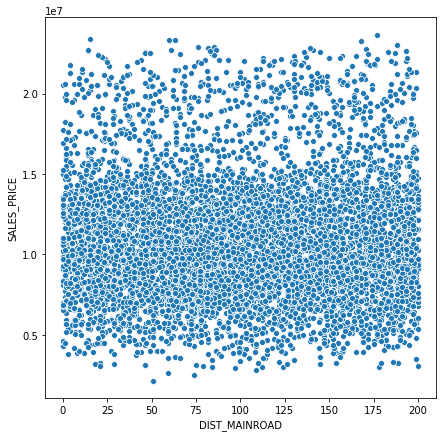

In [50]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="DIST_MAINROAD",y="SALES_PRICE",data=df)

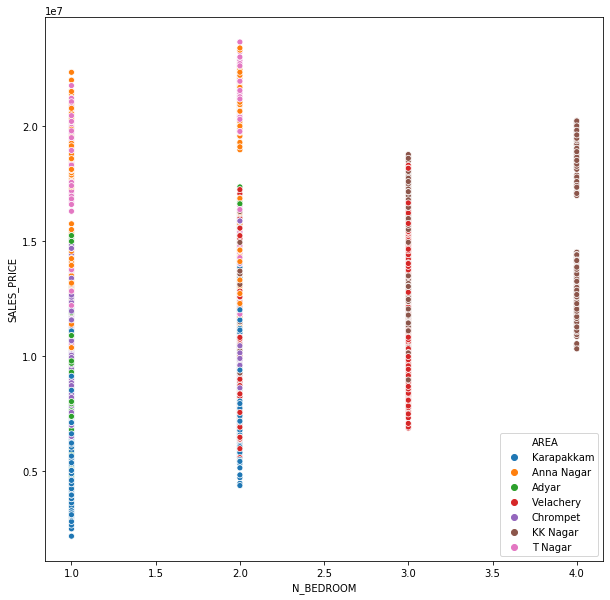

In [51]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="N_BEDROOM",y="SALES_PRICE",hue="AREA",data=df)

It is clearly visible that houses of area<b> Velachery</b> and<b> KK Nagar</b> have relatively more no of rooms<br>
We can divide<b> N_BEDROOM</b> in two columns one  having<b> Velachery</b> and<b> KK Nagar</b> and other having all other <b>AREA</b>.

In [52]:
df["BEDROOM_1"]=df["N_BEDROOM"].copy()
df["BEDROOM_2"]=df["N_BEDROOM"].copy()

In [53]:
df.loc[df["AREA"]=="Velachery","BEDROOM_2"]=0
df.loc[df["AREA"]=="KK Nagar","BEDROOM_2"]=0
df.loc[df["AREA"]!="Velachery","BEDROOM_1"]=0
df.loc[df["AREA"]=="KK Nagar","BEDROOM_1"]=df.loc[df["AREA"]=="KK Nagar","N_BEDROOM"]

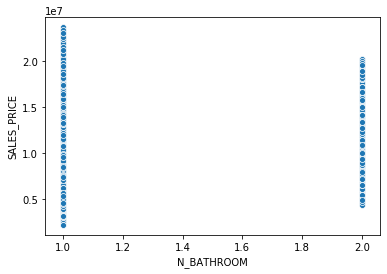

In [54]:
sns.scatterplot(x="N_BATHROOM",y="SALES_PRICE",data=df)

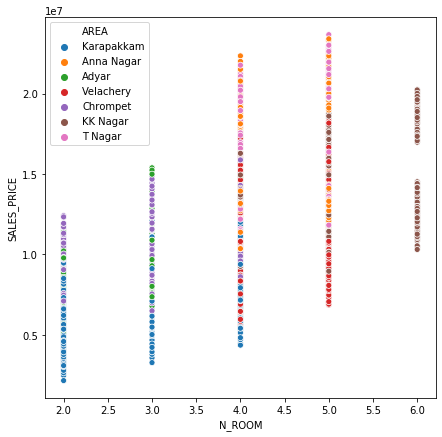

In [55]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="N_ROOM",y="SALES_PRICE",hue="AREA",data=df)

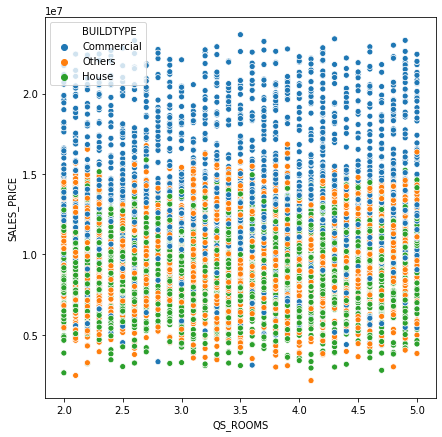

In [56]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="QS_ROOMS",y="SALES_PRICE",hue="BUILDTYPE",data=df)

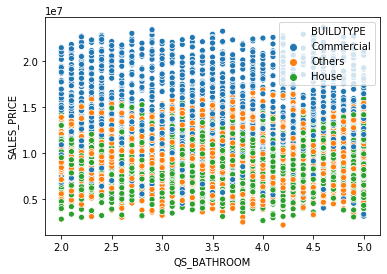

In [57]:
sns.scatterplot(x="QS_BATHROOM",y="SALES_PRICE",hue="BUILDTYPE",data=df)

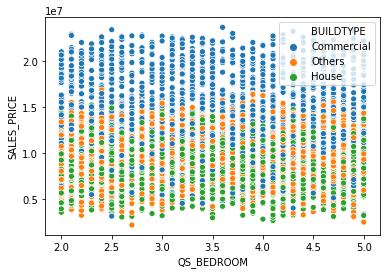

In [58]:
sns.scatterplot(x="QS_BEDROOM",y="SALES_PRICE",hue="BUILDTYPE",data=df)

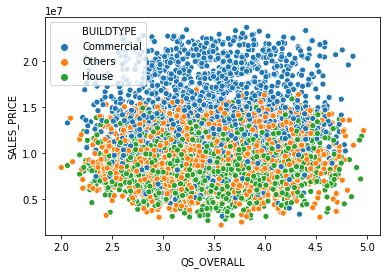

In [59]:
sns.scatterplot(x="QS_OVERALL",y="SALES_PRICE",hue="BUILDTYPE",data=df)

It is clearly visible that we can combined all qulaity scores together as the have high correlation between them<br>
Will do it later after taking a look at correlation matrix

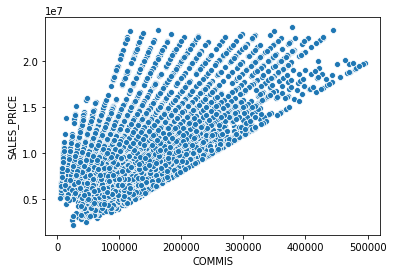

In [60]:
sns.scatterplot(x="COMMIS",y="SALES_PRICE",data=df)

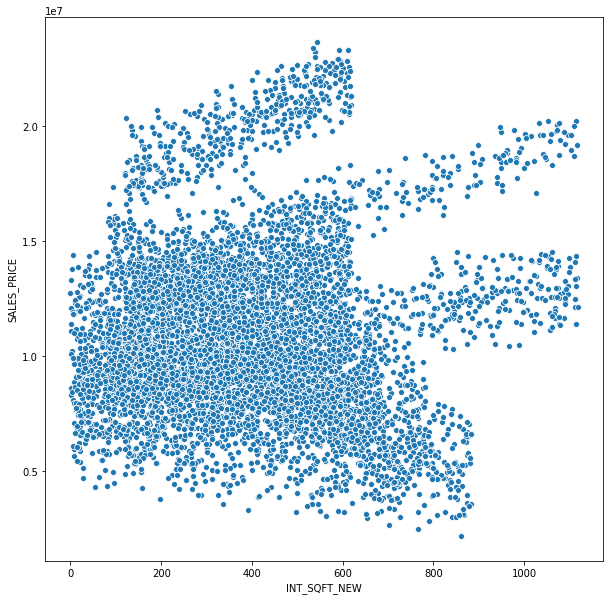

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="INT_SQFT_NEW",y="SALES_PRICE",data=df)

In [62]:
num_cols=["INT_SQFT","DIST_MAINROAD","N_BEDROOM","N_BATHROOM","N_ROOM","QS_ROOMS","QS_BATHROOM",
          "QS_BEDROOM","QS_OVERALL","COMMIS"]
cat_cols=["AREA","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"]

Now lets's drop <b>INT_SQFT_NEW</b> and <b>N_BEDROOM</b>

In [63]:
df.drop(["INT_SQFT_NEW","N_BEDROOM"],axis=1,inplace=True)

In [98]:
for i in ["AREA","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"]:
    dummy= pd.get_dummies(df[i], drop_first= True)
    df= pd.concat([df, dummy], axis= 1)
    df.drop([i],axis= 1, inplace= True)

KeyError: 'AREA'

In [107]:
for i in cat_cols:
    print(i," ==== ",xd[i].unique())

AREA  ====  ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
SALE_COND  ====  ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
PARK_FACIL  ====  ['Yes' 'No' 'Noo']
BUILDTYPE  ====  ['Commercial' 'Others' 'Other' 'House' 'Comercial']
UTILITY_AVAIL  ====  ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
STREET  ====  ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
MZZONE  ====  ['A' 'RH' 'RL' 'I' 'C' 'RM']


In [111]:
print(list(sfs1.k_feature_names_))

['QS_BEDROOM', 'COMMIS', 'INT_SQFT_1', 'INT_SQFT_2', 'BEDROOM_1', 'Anna Nagar', 'Chrompet', 'KK Nagar', 'Karapakkam', 'T Nagar', 'Velachery', 'AdjLand', 'Family', 'Normal Sale', 'Partial', 'Yes', 'House', 'Others', 'ELO', 'NoSeWa', 'NoSewr ', 'No Access', 'Paved', 'C', 'I', 'RH', 'RL', 'RM', 'QS_FINAL', 'BATH_BED']


In [65]:
df.isnull().sum()

DIST_MAINROAD     0
N_BATHROOM        5
N_ROOM            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
INT_SQFT_1        0
INT_SQFT_2        0
BEDROOM_1         0
BEDROOM_2         1
Anna Nagar        0
Chrompet          0
KK Nagar          0
Karapakkam        0
T Nagar           0
Velachery         0
AdjLand           0
Family            0
Normal Sale       0
Partial           0
Yes               0
House             0
Others            0
ELO               0
NoSeWa            0
NoSewr            0
No Access         0
Paved             0
C                 0
I                 0
RH                0
RL                0
RM                0
dtype: int64

In [66]:
df.dropna(axis=0,how="any",inplace=True)

Now let's do some feature selection<br>
I am here applying <b>forward feature selection</b>

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [69]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [70]:
df["QS_FINAL"]=(df["QS_ROOMS"]+df["QS_BATHROOM"]+df["QS_BEDROOM"]+df["QS_OVERALL"])/4
df["BATH_BED"]=df["N_BATHROOM"]+df["N_ROOM"]

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(["SALES_PRICE","QS_ROOMS","QS_BATHROOM",
                            "QS_OVERALL","N_BATHROOM","N_ROOM"],axis=1),df["SALES_PRICE"],random_state=2)

In [72]:
sfs1=sfs(LR,k_features=30,forward=True,verbose=0,scoring="r2",cv=10)

In [73]:
sfs1=sfs1.fit(X_train,Y_train)

In [74]:
print(list(sfs1.k_feature_names_))

['QS_BEDROOM', 'COMMIS', 'INT_SQFT_1', 'INT_SQFT_2', 'BEDROOM_1', 'Anna Nagar', 'Chrompet', 'KK Nagar', 'Karapakkam', 'T Nagar', 'Velachery', 'AdjLand', 'Family', 'Normal Sale', 'Partial', 'Yes', 'House', 'Others', 'ELO', 'NoSeWa', 'NoSewr ', 'No Access', 'Paved', 'C', 'I', 'RH', 'RL', 'RM', 'QS_FINAL', 'BATH_BED']


In [75]:
df1=df[list(sfs1.k_feature_names_)].copy()

In [76]:
LR1=LinearRegression()

In [77]:
X_train_1,X_test_1,Y_train_1,Y_test_1=train_test_split(df1,df["SALES_PRICE"],random_state=10)

In [78]:
LR1.fit(X_train_1,Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
LR1.predict(X_test_1)

array([ 8154840.60217194,  6655801.72336078, 13000927.48763875, ...,
       16598413.05311099, 20640439.38963386, 13482777.0673876 ])

In [80]:
LR1.score(X_test_1,Y_test_1)

0.9436966242904199

Our <b>prediction score</b> came out to be 94%

In [81]:
import joblib

In [82]:
filename = 'house_model.sav'
joblib.dump(LR1, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_1,Y_test_1)
print(result)

0.9436966242904199
